<a href="https://colab.research.google.com/github/felixlys/SEM_Plot/blob/main/Analisis_Data_Responsi_menggunakan_Regresi_Linier_Berganda_dan_SEM_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEM Plot untuk Analisis Data Responsi

In [1]:
library(tidyverse)#Merapikan data
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Berikut merupakan data mengenai responsi dari 95 responden mengenai tingkat kegemaran yang diskalakan berdasarkan angka 1-5. Dengan deskripsi skala sebagai berikut :
1.5:Sangat gemar
2.4:Gemar
3.3:Netral
4.2:Tidak gemar
5.1: Sangat tidak gemar
Adapun pertanyaan yang diajukan adalah mengenai tingkat frekuensi konsumsi :
1. Apakah anda seorang mahasiswa? (1: Mahasiswa,2. Bukan Mahasiswa)
2. Apa tingkat pendidikan terakhir anda? (1: SD, 2: SMP, 3: SMA,4 :SARJANA)
3. Seberapa gemar anda mendengarkan musik(POP''ROCK''REGGAE''JAZZ''SLOW''ROMANCE)? dengan skala sesuai deskripsi
4. Seberapa gemar anda menonton film ('HORROR''COMEDY''ACTION''K.DRAMA''CARTOON''DOCUMENTARY''SCI.FI')?
5. Seberapa gemar anda terhadap pelajaran('FOREIGN.LANG''MATH.SCIENCE''SOCIAL.LAW''ART')?
6. Seberapa gemar anda terhadap media sosial('INSTAGRAM''TIKTOK''GAMES''TWITTER''OTHERS')?



In [8]:
datatabel<-read.csv("databaru_Buat Analisa.csv")
head(datatabel)
names(datatabel)

,X,STATUS,PENDIDIKAN,POP,ROCK,REGGAE,JAZZ,SLOW,ROMANCE,HORROR,⋯,SCI.FI,FOREIGN.LANG,MATH.SCIENCE,SOCIAL.LAW,ART,INSTAGRAM,TIKTOK,GAMES,TWITTER,OTHERS
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,2,3,4,4,4,4,4,3,5,⋯,5,4,4,4,4,4,4,4,4,4
2,2,2,1,5,5,5,5,5,5,4,⋯,5,5,4,4,5,4,5,5,4,4
3,3,2,1,4,5,5,5,5,5,5,⋯,5,5,5,5,5,5,5,5,5,5
4,4,2,2,4,4,4,4,4,5,5,⋯,5,5,5,5,5,4,4,4,4,4
5,5,2,3,5,5,5,5,5,3,5,⋯,5,4,4,4,4,4,4,4,4,4
6,6,2,2,4,4,5,5,4,5,4,⋯,5,4,3,4,4,4,4,5,4,4


[1] "X"            "STATUS"       "PENDIDIKAN"   "POP"          "ROCK"        
 [6] "REGGAE"       "JAZZ"         "SLOW"         "ROMANCE"      "HORROR"      
[11] "COMEDY"       "ACTION"       "K.DRAMA"      "CARTOON"      "DOCUMENTARY" 
[16] "SCI.FI"       "FOREIGN.LANG" "MATH.SCIENCE" "SOCIAL.LAW"   "ART"         
[21] "INSTAGRAM"    "TIKTOK"       "GAMES"        "TWITTER"      "OTHERS"

Misalkan, kita asumsikan bahwa nilai rata-rata tingkat kegemaran dari setiap genre musik merupakan tingkat kegemaran seorang responden terhadap musik, dan berlaku hal yang sama juga untuk filem. Nilai rata-rata tingkat kegemaran setiap subjek diasumsikan sebagai tingkat minat belajar. Kemudian, untuk nilai rata-rata tingkat kegemaran dari setiap media sosial diasumsikan sebagai lama konsumsi gadget yang diasumsikan berada pada selang $1\leq t\leq 5$ jam.
Selanjutnya, akan dimodelkan data-data tersebut dengan model regresi dengan langkah langkah sebagai berikut : \
1. Mengambil nilai rata-rata dari setiap tingkat frekuensi kegemaran

In [15]:
rataan<-datatabel%>%
  mutate(MUSIK=select(.,POP:ROMANCE)%>%rowMeans(),
MOVIE=select(.,HORROR:SCI.FI)%>%rowMeans(),
SUBJECT=select(.,FOREIGN.LANG:ART)%>%rowMeans(),
TIMEONSCREEN=select(.,INSTAGRAM:OTHERS)%>%rowMeans())%>%
  select(STATUS,MUSIK,MOVIE,SUBJECT,TIMEONSCREEN)
head(rataan)

,STATUS,MUSIK,MOVIE,SUBJECT,TIMEONSCREEN
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3.833333,4.428571,4.00,4.0
2,2,5.000000,4.714286,4.50,4.4
3,2,4.833333,5.000000,5.00,5.0
4,2,4.166667,5.000000,5.00,4.0
5,2,4.666667,4.571429,4.00,4.0
6,2,4.500000,4.714286,3.75,4.2


2. Melakukan uji Realibilitas dan Validitas untuk setiap variabel genre musik,film dan media sosial \
Uji Validitas : Mengukur Sejauh mana hasil dapat  mengukur dengan benar apa yang seharusnya diukur\
Uji Realibilitas : Mengukur sejauh mana hasil yang sama bsa diulangi jika menggunakan kondisi yang sama

In [18]:
install.packages("psych")
library(psych)
datatabel%>%
  select(POP:ROMANCE)%>%
  alpha()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha





Reliability analysis   
Call: alpha(x = .)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.76      0.78    0.83      0.38 3.6 0.039  4.2 0.49     0.37

    95% confidence boundaries 
         lower alpha upper
Feldt     0.67  0.76  0.82
Duhachek  0.68  0.76  0.83

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
POP          0.79      0.79    0.84      0.44 3.9    0.035 0.068  0.51
ROCK         0.68      0.71    0.74      0.33 2.4    0.053 0.057  0.32
REGGAE       0.67      0.71    0.73      0.33 2.5    0.053 0.065  0.35
JAZZ         0.67      0.70    0.73      0.32 2.4    0.054 0.057  0.33
SLOW         0.69      0.72    0.75      0.34 2.6    0.051 0.062  0.32
ROMANCE      0.81      0.84    0.85      0.51 5.1    0.033 0.031  0.51

 Item statistics 
         n raw.r std.r r.cor r.drop mean   sd
POP     95  0.62  0.56  0.40   0.34  3.8 0.99
ROCK    95  0.79  0.81  0.81   0.69  4.3 0.63
REGGAE  95  0.

*   Tampak bahwa raw_alpha=0.86>0.6/0.7 (Harus lebih besar daripada 0.6 atau 0.7 tergantung case) sehingga variabel POP Reliable atau dapat dipercaya.
*   Lihat raw.r, raw hitung nya ini harus lebih besar daripada raw/r-table. Cari di tabel r df=95-2=93 ambil signifikasi 5%. Hasil 0.68>0.2017(kriteria POP Valid).

Catatan : Analisis ini juga dilakukan dengan cara yang sama untuk variabel lainnya

2. Membuat Model Regresi Linier

In [19]:
modelregresi<-lm(TIMEONSCREEN~MUSIK+MOVIE+SUBJECT,data=rataan)
summary(modelregresi)


Call:
lm(formula = TIMEONSCREEN ~ MUSIK + MOVIE + SUBJECT, data = rataan)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32326 -0.18887  0.00338  0.25282  1.02954 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.19764    0.47798   2.506 0.014001 *  
MUSIK        0.24868    0.11005   2.260 0.026228 *  
MOVIE        0.14390    0.09728   1.479 0.142528    
SUBJECT      0.32764    0.09289   3.527 0.000661 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4408 on 91 degrees of freedom
Multiple R-squared:  0.328,	Adjusted R-squared:  0.3058 
F-statistic:  14.8 on 3 and 91 DF,  p-value: 6.294e-08


Didapatkan model regresi linier sebagai berikut
$$Y=1.19764+0.24868 X_{1}+0.14390 X_{2}+0.32764X_{3}$$
dengan $Y$:Lamanya konsumsi gadget, $X_{1}$: Tingkat kegemaran responden terhadap musik,$X_{2}$: Tingkat kegemaran responden terhadap film, $X_{3}$ tingkat kegemaran sesorang terhadap Pelajaran. Nilai $Pr(>|t|)/pval$ menunjukkan tingkat keberpengaruhan variabel-variabel independen terhadap nilai $Y$, sebagai contoh MUSIK memiliki $pval=0.026< 0.05$ sehingga MUSIK berpengaruh signifikan terhadap nilai $Y$, MOVIE memiliki  $pval=0.142> 0.05$ sehingga MOVIE tidak berpengaruh signifikan terhadap nilai $Y$.

2. Uji Asumsi Klasik

Ada 4 poin yang harus dipenuhi untuk suatu model regresi linier


*   **Uji Residual**: uji kenormalan residual





In [21]:
install.packages("nortest")
library(nortest)
lillie.test(modelregresi$residuals)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelregresi$residuals
D = 0.09926, p-value = 0.02193


Karena $pvalue=0.01584 < 0.05$ artinya model ini memiliki residual yg tidak terdistribusi normal. Oleh karena itu, salah satu cara agar residualnya terdistribusi normal, kita harus membuang data-data outlier. Untuk mengetahui data-data outlier, digunakan boxplot untuk melihat nya.

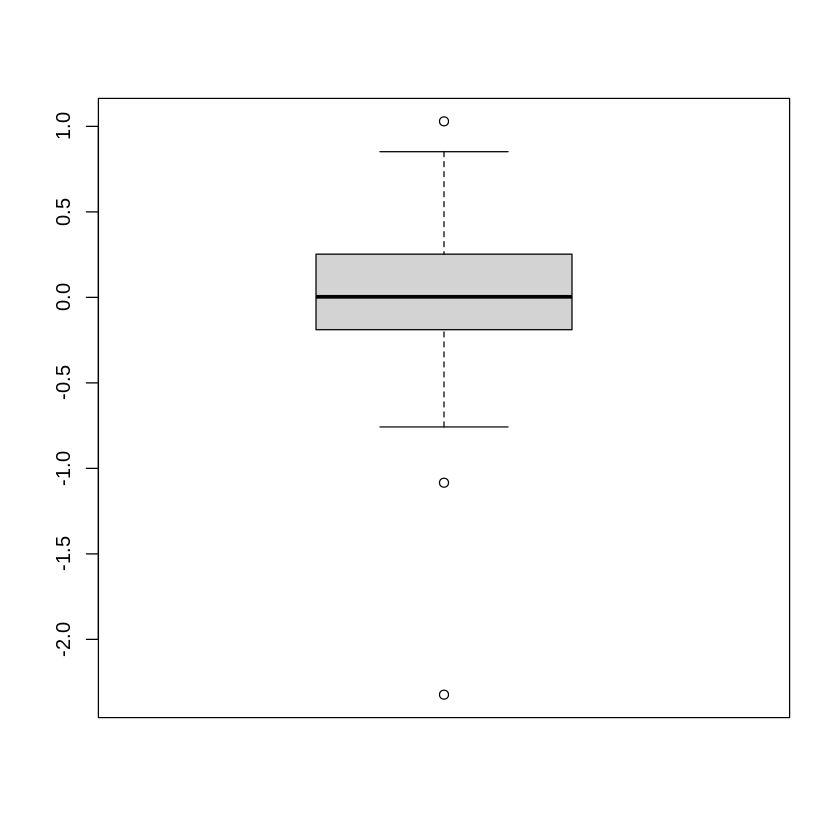

In [22]:
boxplot(modelregresi$residuals)

Tampak bahwa, data residual yang direpresentasikan sebagai bulat-bulatan kecil merupakan data-data outlier.

In [32]:
rataan1<-rataan%>%
  mutate(res=modelregresi$residuals)%>%
  filter(res>-2)
head(rataan1)

,STATUS,MUSIK,MOVIE,SUBJECT,TIMEONSCREEN,res
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3.833333,4.428571,4.00,4.0,-0.09874801
2,2,5.000000,4.714286,4.50,4.4,-0.19381236
3,2,4.833333,5.000000,5.00,5.0,0.24270318
4,2,4.166667,5.000000,5.00,4.0,-0.59150687
5,2,4.666667,4.571429,4.00,4.0,-0.32654258
6,2,4.500000,4.714286,3.75,4.2,-0.02374340


Perhatikan bahwa rataan1 merupakan data yang sudah terbebas dari data yang nilai residualnya(res<-2). Selanjutnya, akan dilakukan pembentukan model regresi linier dari data-data yang telah dibersihkan dari outlier

In [33]:
modelregresi1<-lm(TIMEONSCREEN~MUSIK+MOVIE+SUBJECT,data=rataan1)
summary(modelregresi1)


Call:
lm(formula = TIMEONSCREEN ~ MUSIK + MOVIE + SUBJECT, data = rataan1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13766 -0.21988  0.00186  0.22946  1.05356 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.31551    0.39511   3.329  0.00126 ** 
MUSIK        0.14743    0.09217   1.600  0.11319    
MOVIE        0.12069    0.08041   1.501  0.13687    
SUBJECT      0.42780    0.07820   5.470    4e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.364 on 90 degrees of freedom
Multiple R-squared:  0.4308,	Adjusted R-squared:  0.4118 
F-statistic:  22.7 on 3 and 90 DF,  p-value: 4.941e-11


Didapatkan model regresi linier sebagai berikut
$$Y=1.31551+0.14743 X_{1}+ 0.12069 X_{2}+0.42780X_{3}$$
dengan $Y$:Lamanya konsumsi gadget, $X_{1}$: Tingkat kegemaran responden terhadap musik,$X_{2}$: Tingkat kegemaran responden terhadap film, $X_{3}$ tingkat kegemaran sesorang terhadap Pelajaran. Selanjutnya, dilakukan uji residual

In [34]:
lillie.test(modelregresi1$residuals)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  modelregresi1$residuals
D = 0.079905, p-value = 0.1471


Karena $pvalue=0.1471 > 0.05$ artinya model ini memiliki residual yang terdistribusi normal.\

Proses berikutnya adalah menggabungkan data residual terbaru (yang sudah terdistribusi normal) dengan data regresi sebelumnya

In [35]:
library(MASS)
rataan1<-rataan1%>%
  dplyr::select(-res)%>%#menghapus residual sebelumnya
  mutate(residual=modelregresi1$residuals,#kita mengisi data residual yang baru
         fitvalue=modelregresi1$fitted.values,
         studentizedres=studres(modelregresi1))
head(rataan1)

,STATUS,MUSIK,MOVIE,SUBJECT,TIMEONSCREEN,residual,fitvalue,studentizedres
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3.833333,4.428571,4.00,4.0,-0.12634092,4.126341,-0.3501104
2,2,5.000000,4.714286,4.50,4.4,-0.14672783,4.546728,-0.4093071
3,2,4.833333,5.000000,5.00,5.0,0.22946386,4.770536,0.6401726
4,2,4.166667,5.000000,5.00,4.0,-0.67224684,4.672247,-1.9217865
5,2,4.666667,4.571429,4.00,4.0,-0.26644378,4.266444,-0.7432205
6,2,4.500000,4.714286,3.75,4.2,0.04783638,4.152164,0.1339432


*  **Uji Multikolinieritas**:
Tujuan dari uji multikolinieritas adalah untuk mendeteksi apakah terdapat korelasi yang tinggi di antara variabel independen (predictor) dalam model regresi.
Apakah ada dua atau lebih variabel independen memiliki hubungan linear yang kuat



In [36]:
install.packages("car")
library(car)
vif(modelregresi1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




MUSIK    MOVIE  SUBJECT 
1.413186 1.326361 1.319299

Batas nilai $vif=10$ klo kurang dari 10 tanda nya variabel independen MUSIK,MOVIE,SUBJECT tdk memiliki korelasi yg kuat.


*   Uji Heterokedasitas

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  modelregresi1
BP = 1.0531, df = 3, p-value = 0.7884


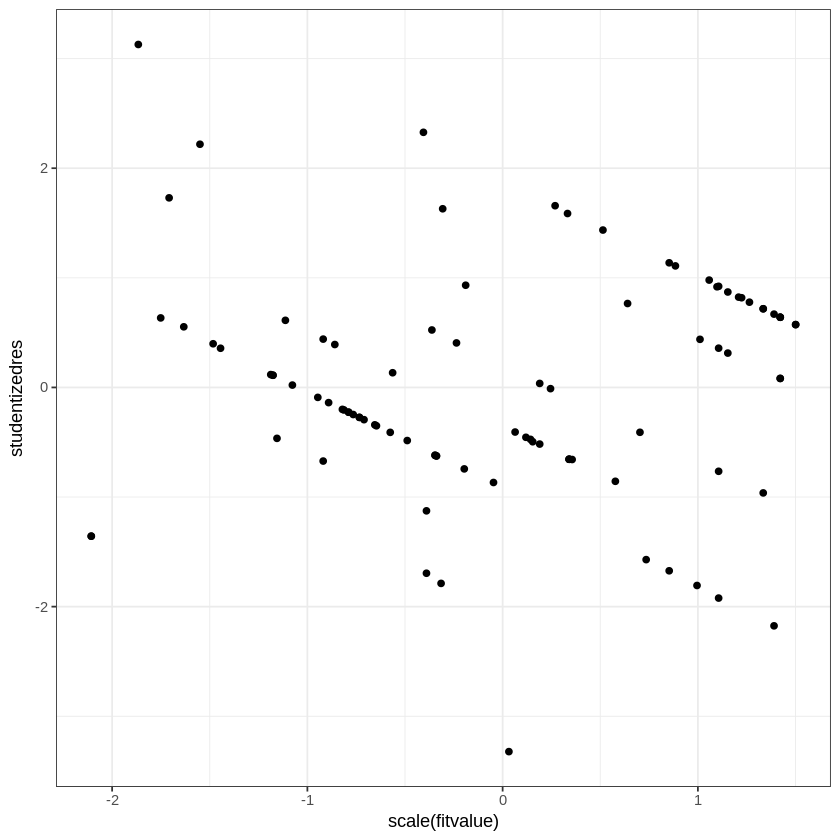

In [38]:
#Uji Breusch-Pagan
install.packages("lmtest")
library(lmtest)
bptest(modelregresi1)
rataan1%>%
  ggplot(aes(x=scale(fitvalue), y=studentizedres))+
  geom_point()+
  theme_bw()

Berdasarkan Uji Breusch-Pagan didapat nilai $pval=0.7884$ artinya model regresi tidak menyalahi syarat heterokedasitas. Pada kurva fitvalue dan studentizedres model dikatakan memenuhi syarat ketika titik-titik data tidak membentuk suatu pola fungsi.

*   **Uji Autokorelasi** :
Bertujuan untuk memeriksa apakah residual atau error dari model regresi memiliki korelasi dengan dirinya sendiri pada waktu yang berbeda.

In [39]:
dwtest(modelregresi1)
summary(modelregresi1)


	Durbin-Watson test

data:  modelregresi1
DW = 2.0099, p-value = 0.4993
alternative hypothesis: true autocorrelation is greater than 0



Call:
lm(formula = TIMEONSCREEN ~ MUSIK + MOVIE + SUBJECT, data = rataan1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13766 -0.21988  0.00186  0.22946  1.05356 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.31551    0.39511   3.329  0.00126 ** 
MUSIK        0.14743    0.09217   1.600  0.11319    
MOVIE        0.12069    0.08041   1.501  0.13687    
SUBJECT      0.42780    0.07820   5.470    4e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.364 on 90 degrees of freedom
Multiple R-squared:  0.4308,	Adjusted R-squared:  0.4118 
F-statistic:  22.7 on 3 and 90 DF,  p-value: 4.941e-11


p-value=0.4993>0.05 (lebih besar dari 0,05) menunjukkan bahwa tidak ada bukti cukup untuk menolak hipotesis nol (H0) bahwa tidak ada autokorelasi dalam residual.

3. **Membentuk Model Regresi Intervening** \
Ada dua model regresi yang ditinjau adalah antara lain :

*  Model 1  : Model regresi linier GADGET dengan variabel independen MUSIK,MOVIE, SUBJECT, yang dikonstruksi sebelumnya.
*  Model 2 : Model regresi linier SUBJECT dengan variabel independen MUSIK dan MOVIE. Disini, model ini digunakan untuk mengetahui hubungan tingkat kegemaran MUSIK dan MOVIE terhadap tingkat kegemaran belajar.
Selanjutnya, akan dilakukan pemodelan regresi linier kedua



In [42]:
install.packages("lm.beta")
library(lm.beta)
model2<-lm(SUBJECT~MUSIK+MOVIE,data=rataan1)
summary(model2)
#Uji asumsi klasik
lm.beta(model2)
lillie.test(model2$residuals)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = SUBJECT ~ MUSIK + MOVIE, data = rataan1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.62725 -0.23099  0.07027  0.33440  0.80349 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.6902     0.4991   3.386  0.00105 **
MUSIK         0.3917     0.1165   3.361  0.00114 **
MOVIE         0.2349     0.1049   2.239  0.02762 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4879 on 91 degrees of freedom
Multiple R-squared:  0.242,	Adjusted R-squared:  0.2254 
F-statistic: 14.53 on 2 and 91 DF,  p-value: 3.345e-06



Call:
lm(formula = SUBJECT ~ MUSIK + MOVIE, data = rataan1)

Standardized Coefficients::
(Intercept)       MUSIK       MOVIE 
         NA   0.3439267   0.2290730 



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model2$residuals
D = 0.11706, p-value = 0.00287


Perhatikan, bahwa residual dari model regresi kedua tidak berdistribusi normal. Oleh karena itu, dilakukan proses eleminasi data outlier dengan cara yang sama seperti sebelumnya

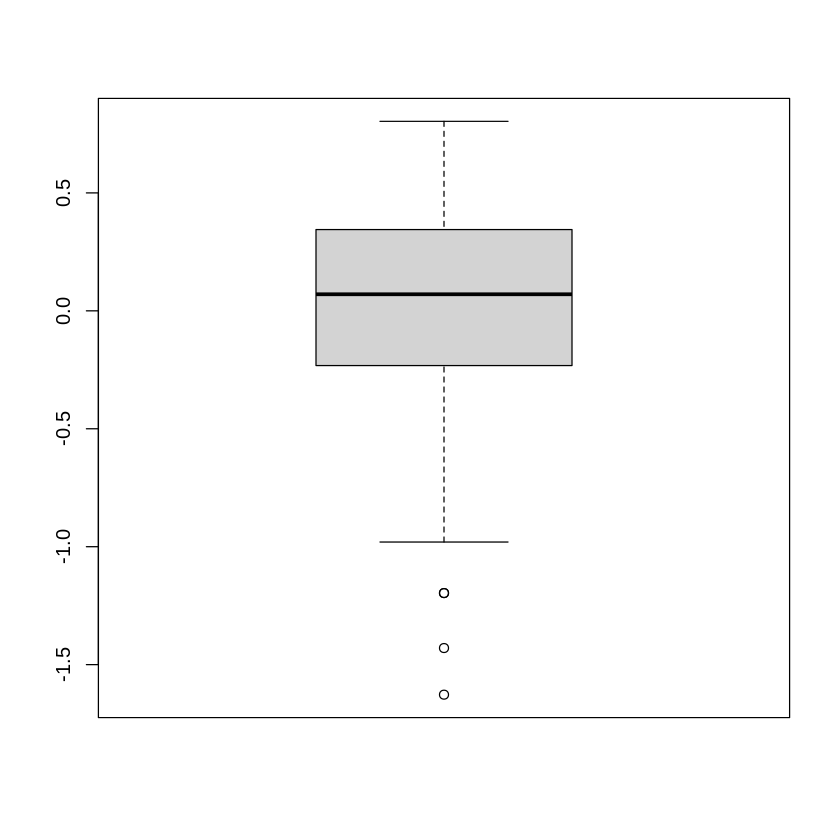

In [43]:
boxplot(model2$residuals)

Kita perlu mengeluarkan data yang residual nya dibawah -1.


In [44]:
rataan2<-rataan1%>%
  mutate(res=model2$residuals)%>%
  filter(res>(-1))
head(rataan2)

,STATUS,MUSIK,MOVIE,SUBJECT,TIMEONSCREEN,residual,fitvalue,studentizedres,res
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3.833333,4.428571,4.00,4.0,-0.12634092,4.126341,-0.3501104,-0.2319114
2,2,5.000000,4.714286,4.50,4.4,-0.14672783,4.546728,-0.4093071,-0.2559663
3,2,4.833333,5.000000,5.00,5.0,0.22946386,4.770536,0.6401726,0.2421932
4,2,4.166667,5.000000,5.00,4.0,-0.67224684,4.672247,-1.9217865,0.5033004
5,2,4.666667,4.571429,4.00,4.0,-0.26644378,4.266444,-0.7432205,-0.5918541
6,2,4.500000,4.714286,3.75,4.2,0.04783638,4.152164,0.1339432,-0.8101359


Tahap berikutnya, kita akan memodelkan regresi linier yang memuat data-data yang terbebas dari residual outlier baik untuk model 1 dan model 2,

In [50]:

library(lm.beta)
model1f<-lm(TIMEONSCREEN~MUSIK+MOVIE+SUBJECT,data=rataan2)
summary(model1f)
model1fkoef<-summary(lm.beta(model1f))
model1fkoef


Call:
lm(formula = TIMEONSCREEN ~ MUSIK + MOVIE + SUBJECT, data = rataan2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1405 -0.2242 -0.0187  0.2439  1.0006 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.48259    0.41079   3.609 0.000515 ***
MUSIK        0.15916    0.09352   1.702 0.092385 .  
MOVIE        0.11818    0.08449   1.399 0.165508    
SUBJECT      0.38267    0.09826   3.895 0.000194 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3637 on 86 degrees of freedom
Multiple R-squared:  0.3714,	Adjusted R-squared:  0.3495 
F-statistic: 16.94 on 3 and 86 DF,  p-value: 9.882e-09



Call:
lm(formula = TIMEONSCREEN ~ MUSIK + MOVIE + SUBJECT, data = rataan2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1405 -0.2242 -0.0187  0.2439  1.0006 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)  1.48259           NA    0.41079   3.609 0.000515 ***
MUSIK        0.15916      0.17486    0.09352   1.702 0.092385 .  
MOVIE        0.11818      0.14254    0.08449   1.399 0.165508    
SUBJECT      0.38267      0.41033    0.09826   3.895 0.000194 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3637 on 86 degrees of freedom
Multiple R-squared:  0.3714,	Adjusted R-squared:  0.3495 
F-statistic: 16.94 on 3 and 86 DF,  p-value: 9.882e-09


Didapatkan model regresi linier sebagai berikut
$$Y=1.48259+0.15916 X_{1}+ 0.11818 X_{2}+0.38267 X_{3}$$
dengan $Y$:Lamanya konsumsi gadget, $X_{1}$: Tingkat kegemaran responden terhadap musik,$X_{2}$: Tingkat kegemaran responden terhadap film, $X_{3}$ tingkat kegemaran sesorang terhadap Pelajaran.

Selanjutnya, untuk model 2


In [52]:
model2x <- lm(SUBJECT~MUSIK + MOVIE, data=rataan2)
summary(lm.beta(model2x))

lillie.test(model2x$residuals)#Residual terdistribusi normal pval=0.9952>0.05
bptest(model2x)


Call:
lm(formula = SUBJECT ~ MUSIK + MOVIE, data = rataan2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04381 -0.24498  0.07542  0.30994  0.74835 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)  1.68771           NA    0.41007   4.116 8.75e-05 ***
MUSIK        0.34586      0.35437    0.09506   3.638 0.000465 ***
MOVIE        0.29513      0.33198    0.08659   3.408 0.000992 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3968 on 87 degrees of freedom
Multiple R-squared:  0.3416,	Adjusted R-squared:  0.3265 
F-statistic: 22.57 on 2 and 87 DF,  p-value: 1.271e-08



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  model2x$residuals
D = 0.087333, p-value = 0.08691



	studentized Breusch-Pagan test

data:  model2x
BP = 0.17045, df = 2, p-value = 0.9183


Tampak bahwa berdasarkan uji Kolmogrov-Smirnov didapat p-value = 0.08691>0.05 artinya data residual terdistribusi normal(memenuhi asumsi).Sehingga, model regresi 2 adalah ⁉

$$X_{3}=1.68771+0.34586 X_{2}+ 0.29513 X_{1}$$
dengan $X_{1}$: Tingkat kegemaran responden terhadap musik,$X_{2}$: Tingkat kegemaran responden terhadap film, $X_{3}$ tingkat kegemaran sesorang terhadap Pelajaran.

4. SEM Plot

In [58]:
install.packages("semPlot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘OpenMx’




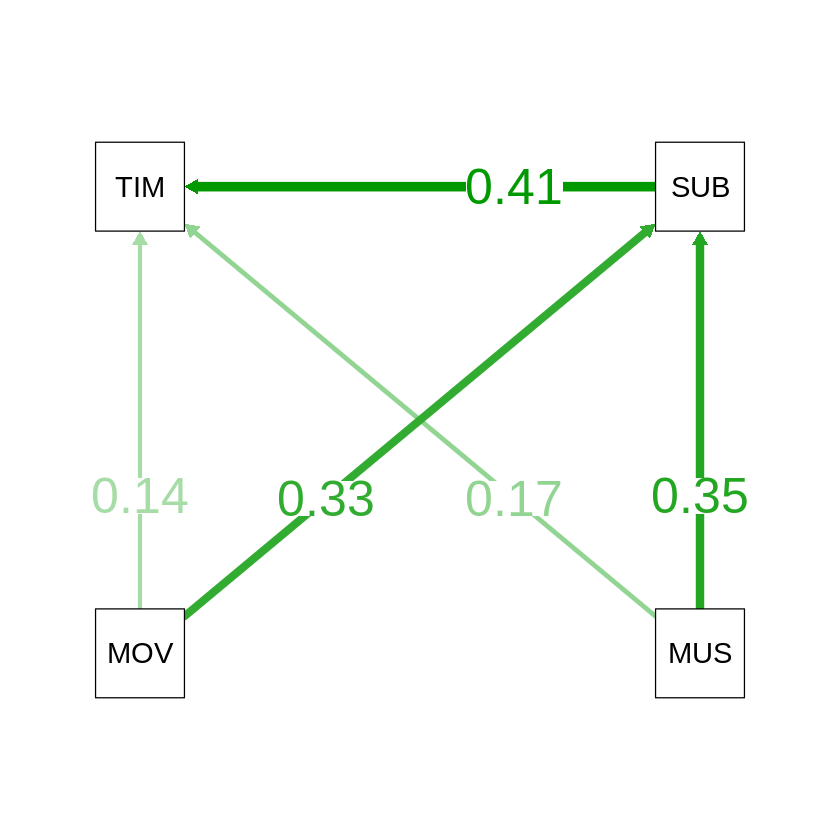

In [60]:

library(semPlot)
semPaths(list(model1f,model2x),what='std', intercepts = F, layout = 'tree',
         style = 'lisrel',edge.label.cex = 2.5, sizeMan = 10, rotation = 3,
         edge.label.position = 0.3)

5. KESIMPULAN
Diagram SEM Plot ini menunjukkan bahwa
1. TIM=TIME merupakan $0.14*MOV+0.17*MUS+0.41*SUB$ yang artinya waktu konsumsi gadget sangat dipengaruhi oleh minat belajar,
2. SUB=SUBJECT merupakan $0.33*MOV+0.35*MUS$ yang artinya tingkat minat belajar paling dipengaruhi oleh tingkat minat menonton film.